In [14]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# import data
reg_data = pd.read_csv("data/data_multivar2.csv", header=None)
X = np.array([reg_data[0]]).T
y = np.array([reg_data[1]]).T

num_clusters = 4

print "Reg_data.head()\n", reg_data.head(), "\n"
print "Top of X: \n", X[:5], "\n"
print "Top of y: \n", y[:5], "\n"
print "Shape of X is: ", X.shape, "\n"
print "Shape of y is: ", y.shape

Reg_data.head()
      0     1  2
0  8.73  0.31  2
1  4.71 -0.42  3
2  4.58  6.18  1
3  9.38  2.18  2
4  4.78  5.28  1 

Top of X: 
[[ 8.73]
 [ 4.71]
 [ 4.58]
 [ 9.38]
 [ 4.78]] 

Top of y: 
[[ 0.31]
 [-0.42]
 [ 6.18]
 [ 2.18]
 [ 5.28]] 

Shape of X is:  (400, 1) 

Shape of y is:  (400, 1)


([], <a list of 0 Text yticklabel objects>)

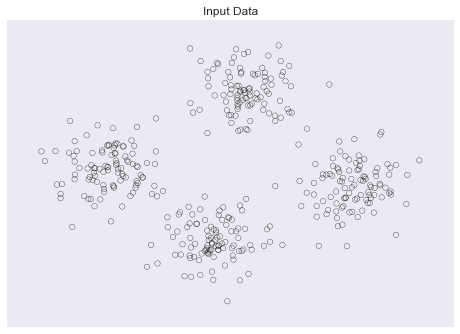

In [3]:
plt.scatter(X, y, marker='o', facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(X)-1, max(X)+1
y_min, y_max = min(y)-1, max(y)+1
plt.title('Input Data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [4]:
kmeans = KMeans(init='k-means++', n_clusters = num_clusters, n_init=10)
kmeans.fit(reg_data.values[:, :-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# Make a mesh
step_size = 0.01
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])
predicted_labels = predicted_labels.reshape(x_values.shape)


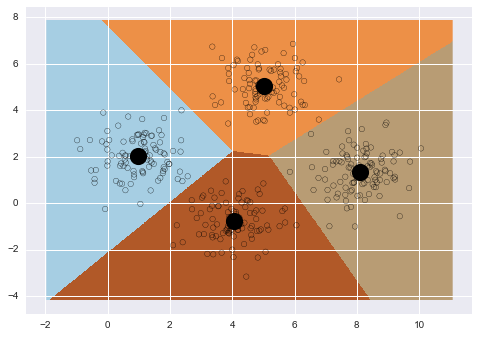

In [6]:
plt.imshow(predicted_labels, interpolation='nearest',
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

plt.scatter(X, y, marker='o', facecolors='none', edgecolors='k', s=30)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3, color='k', zorder=10, facecolors='black')

# Calculate Silhouette Score

In [12]:
sil_scores = []
cluster_range = np.arange(2,10)

for cluster_num in cluster_range:
    kmeans = KMeans(init='k-means++', n_clusters = cluster_num, n_init=10)
    kmeans.fit(reg_data.values[:, :-1])
    score = metrics.silhouette_score(reg_data.values[:, :-1], kmeans.labels_, metric='euclidean', 
                                     sample_size=len(reg_data.values[:, :-1]))
    print "\nNumber of clusters =", cluster_num
    print "Silhouette score =", score
    sil_scores.append(score)


Number of clusters = 2
Silhouette score = 0.471972783113

Number of clusters = 3
Silhouette score = 0.552128853113

Number of clusters = 4
Silhouette score = 0.661706452699

Number of clusters = 5
Silhouette score = 0.570233738007

Number of clusters = 6
Silhouette score = 0.468831349607

Number of clusters = 7
Silhouette score = 0.386939760855

Number of clusters = 8
Silhouette score = 0.325370786939

Number of clusters = 9
Silhouette score = 0.31917922692


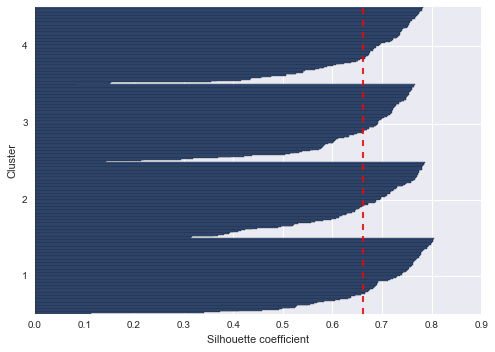

In [28]:
kmeans = KMeans(init='k-means++', n_clusters = 4, n_init=10)
y_km = kmeans.fit_predict(reg_data.values[:, :-1])

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = metrics.silhouette_samples(reg_data.values[:, :-1], y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
y_ticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0)
    y_ticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# Calculate DBSCAN

In [16]:
# Initialize search for best epsilon
eps_grid = np.linspace(0.2, 1.1, num=10)
silhouette_scores = []
eps_best = eps_grid[0]
silhouette_score_max = -1
model_best = None
labels_best = None

In [22]:
# Look for the best epsilon
for eps in eps_grid:
    dbscan_model = DBSCAN(eps=eps, min_samples=5).fit(reg_data.values[:, :-1])
    labels = dbscan_model.labels_
    silhouette_score = metrics.silhouette_score(reg_data.values[:, :-1], labels)
    silhouette_scores.append(silhouette_score)
    print "Epsilon:", eps, "--> silhouette score:", silhouette_score
    
    if silhouette_score > silhouette_score_max:
        silhouette_score_max = silhouette_score
        eps_best = eps
        model_best = dbscan_model
        labels_best = labels


# Print results
offset = 0
if -1 in labels_best:
    offset = 1
print "\nBest Epsilon:", eps_best
print "Estimated number of clusters:", len(set(labels_best)) - offset


Epsilon: 0.2 --> silhouette score: -0.415838915182
Epsilon: 0.3 --> silhouette score: -0.162080648006
Epsilon: 0.4 --> silhouette score: 0.172799071762
Epsilon: 0.5 --> silhouette score: 0.477682787816
Epsilon: 0.6 --> silhouette score: 0.605155470741
Epsilon: 0.7 --> silhouette score: 0.621472676201
Epsilon: 0.8 --> silhouette score: 0.638812887592
Epsilon: 0.9 --> silhouette score: 0.533511690804
Epsilon: 1.0 --> silhouette score: 0.542612347657
Epsilon: 1.1 --> silhouette score: 0.070732457994

Best Epsilon: 0.8
Estimated number of clusters: 4
